**Controle estatístico de processo**

Carta de Controle

*Xbarra e R*

In [1]:
#Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import numpy as np
from numpy.polynomial.polynomial import Polynomial

In [2]:
# Caminho para o arquivo Excel (substitua 'caminho_para_o_arquivo.xlsx' pelo caminho real do seu arquivo)
caminho_do_arquivo = 'Cap6 - dados.xlsx'

# Ler o arquivo Excel
df = pd.read_excel(caminho_do_arquivo)

# Mostrar as primeiras linhas do arquivo
df.head()

,p1,p2,p3,p4,p5
0,1.3235,1.4128,1.6744,1.4573,1.6914
1,1.4314,1.3592,1.6075,1.4666,1.6109
2,1.4284,1.4871,1.4932,1.4324,1.5674
3,1.5028,1.6352,1.3841,1.2831,1.5507
4,1.5604,1.2735,1.5265,1.4363,1.6441


In [5]:
df.describe()

,p1,p2,p3,p4,p5
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.487584,1.487016,1.523680,1.466024,1.563748
std,0.110641,0.136745,0.136903,0.121858,0.144880
min,1.285600,1.273500,1.236100,1.183900,1.192800
25%,1.415800,1.403600,1.427800,1.390800,1.488000
50%,1.473800,1.441200,1.535500,1.466600,1.551900
75%,1.579700,1.545100,1.607500,1.556300,1.686600
max,1.710600,1.766700,1.836600,1.645800,1.866200


In [7]:
!pip install GaugeRnR

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13773 sha256=085d11b615f86b2bfe1078ac6eba5de551fb7fe2e4a1addcd4d429a329aa0ea3
  Stored in directory: c:\users\erive\appdata\local\pip\cache\wheels\1a\bf\a1\4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt


In [11]:
data = df

In [13]:
# Fonte: https://www.kaggle.com/nalkrolu/statistical-process-control-quality-control/notebook#X-R-Control-Chart

class XR_ControlChart:
    
    def fit(self,data):
        
        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.R = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.R[i] = data[i].max() - data[i].min()
        
        self.data = data
        
    def ControlChart(self,A2,D3,D4):

        ucl_X   = self.X.mean() + A2*self.R.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - A2*self.R.mean()

        ucl_R   = D4*self.R.mean()
        cl_R    = self.R.mean() 
        lcl_R   = D3*self.R.mean()
        
        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.R,marker="o",color="k",label="R")
        plt.plot([ucl_R]*len(self.X),color="r",label="UCL={}".format(ucl_R.round(2)))
        plt.plot([cl_R]*len(self.X),color="b",label="CL={}".format(cl_R.round(2)))
        plt.plot([lcl_R]*len(self.X),color="r",label="LCL={}".format(lcl_R.round(2)))
        plt.title("R Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.R)
        plt.title("Boxplot R")
        plt.xlabel("R")
        plt.show()

In [15]:
data_controle = np.array(data[['p1','p2','p3','p4']])

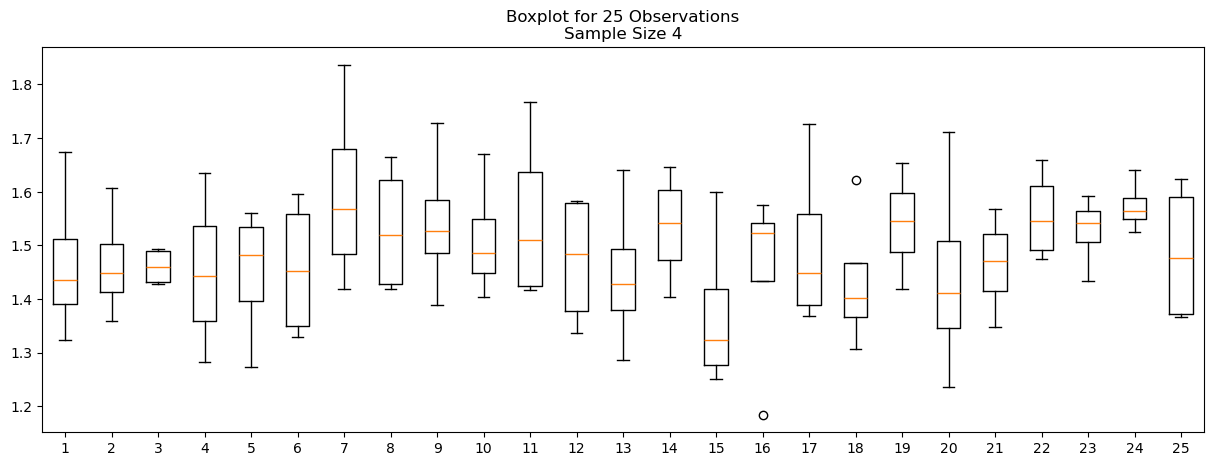

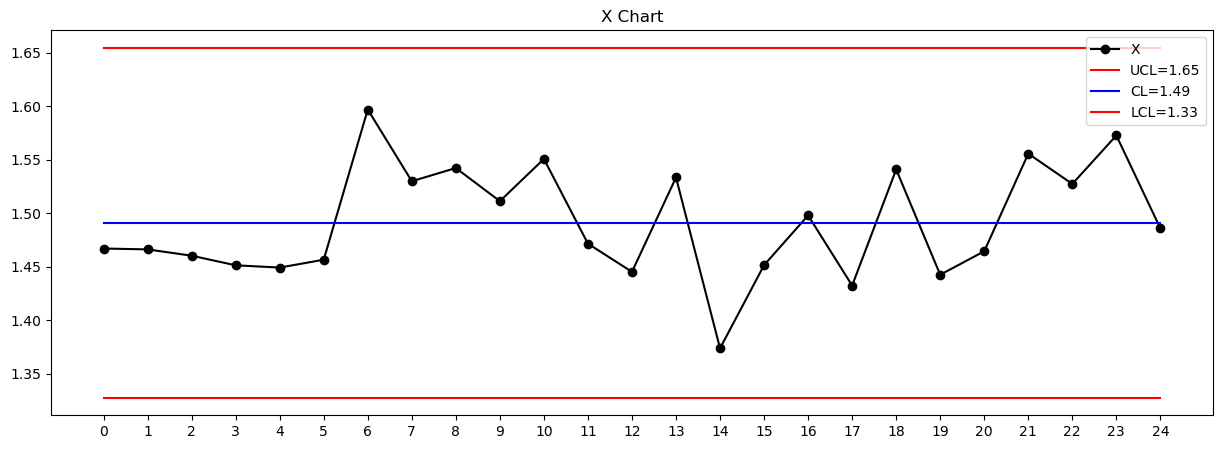

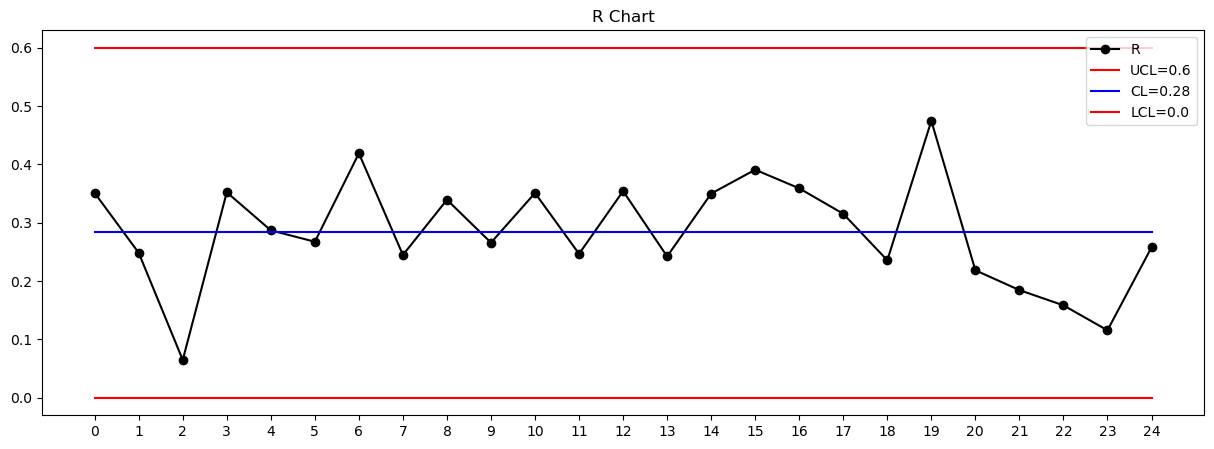

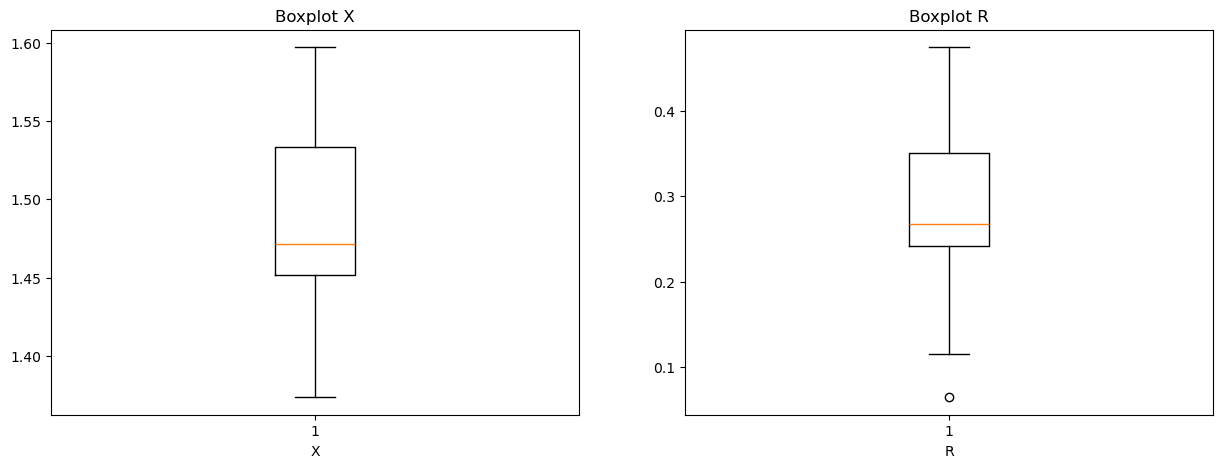

In [20]:
chart = XR_ControlChart()
chart.fit(data_controle)
chart.ControlChart(A2 = 0.577, D3 = 0 , D4 = 2.114)

**Outra forma de calcular a carta de controle**

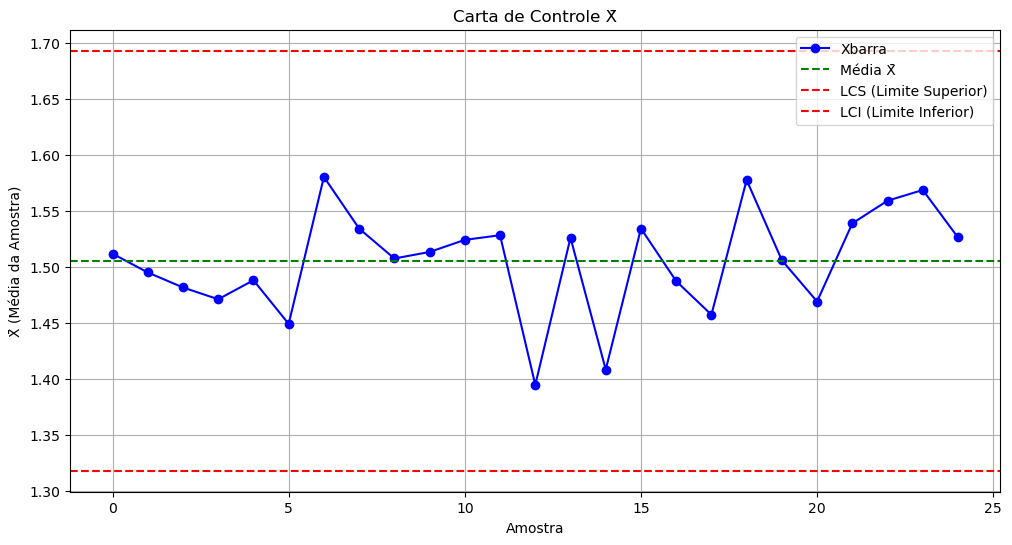

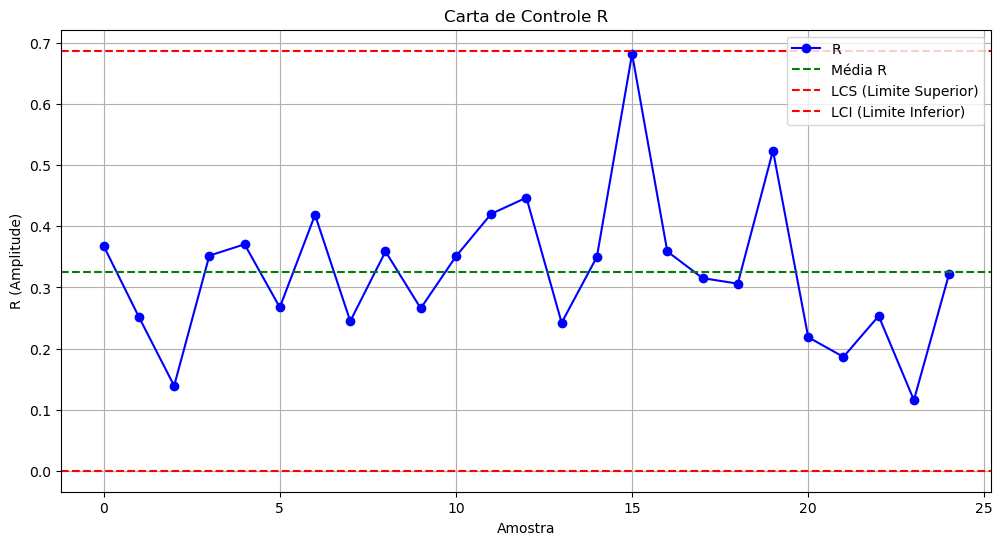

In [23]:
# Passo 2: Calcular as médias das amostras (X̄) e a amplitude (R)
# Cada linha corresponde a uma amostra
df['Xbarra'] = df.mean(axis=1)
df['R'] = df.max(axis=1) - df.min(axis=1)

# Passo 3: Calcular as estatísticas para as cartas de controle
Xbarra_media = df['Xbarra'].mean()
R_media = df['R'].mean()

# Constantes de controle para cartas X̄ e R (supondo amostras de tamanho 5)
# A2, D3, D4 são constantes baseadas no tamanho da amostra (n). Para n=5:
A2 = 0.577
D3 = 0
D4 = 2.114

# Limites de Controle para X̄
UCL_Xbarra = Xbarra_media + A2 * R_media
LCL_Xbarra = Xbarra_media - A2 * R_media

# Limites de Controle para R
UCL_R = D4 * R_media
LCL_R = D3 * R_media

# Passo 4: Criar os gráficos X̄ e R

# Carta de Controle X̄
plt.figure(figsize=(12,6))
plt.plot(df['Xbarra'], marker='o', linestyle='-', color='b', label='Xbarra')
plt.axhline(y=Xbarra_media, color='green', linestyle='--', label='Média X̄')
plt.axhline(y=UCL_Xbarra, color='red', linestyle='--', label='LCS (Limite Superior)')
plt.axhline(y=LCL_Xbarra, color='red', linestyle='--', label='LCI (Limite Inferior)')
plt.title('Carta de Controle X̄')
plt.xlabel('Amostra')
plt.ylabel('X̄ (Média da Amostra)')
plt.legend()
plt.grid(True)
plt.show()

# Carta de Controle R
plt.figure(figsize=(12,6))
plt.plot(df['R'], marker='o', linestyle='-', color='b', label='R')
plt.axhline(y=R_media, color='green', linestyle='--', label='Média R')
plt.axhline(y=UCL_R, color='red', linestyle='--', label='LCS (Limite Superior)')
plt.axhline(y=LCL_R, color='red', linestyle='--', label='LCI (Limite Inferior)')
plt.title('Carta de Controle R')
plt.xlabel('Amostra')
plt.ylabel('R (Amplitude)')
plt.legend()
plt.grid(True)
plt.show()
